In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import time
import pylab
import math
from scipy.stats import chi2

In [2]:
data_info_emplacement = 'all/node_information.csv'
training_set_emplacement = 'all/training_set.txt'
testing_set_emplacement = 'all/testing_set.txt'

In [3]:
def load_data_info(emplacement):
    data_array = list(csv.reader(open(emplacement, "r")))
    node_info = pd.DataFrame(data_array)
    node_info.columns = ['id', 'Publication_year','Title','Authors','Journal','abstract']
    node_info.set_index('id', inplace=True)
    
    return node_info

In [4]:
def load_training_data(emplacement):
    training_set = pd.read_csv(emplacement, header=None, sep=' ')
    training_set.columns = ['article1','article2','link']
    return training_set

In [5]:
def load_testing_data(emplacement):
    testing_set = pd.read_csv(emplacement, header=None, sep=' ')
    testing_set.columns = ['article1','article2']
    return testing_set

In [6]:
node_info = load_data_info(data_info_emplacement)
trng = load_training_data(training_set_emplacement)
tstg = load_testing_data(testing_set_emplacement)

In [7]:
def author_name_poundered_presence(node_info):   
    d = author_occurence(node_info)
    L = set(d.index.values)
    data= pd.DataFrame(np.zeros([len(node_info), len(L)]), columns=L, index=node_info.index)
    
    for i in data.index:
        for k in node_info.loc[i].Authors.lower().split(","):
            data.loc[i][k] = 4*chi2.pdf(d[k]/5,3)
    
    return data

In [8]:
def author_occurence(node_info):
    a = list(node_info.Authors.apply(lambda x: x.lower().split(",")).values)
    L = []
    for k in a:
        for j in k:
                L.append(j)
    return pd.DataFrame(np.array(L))[0].value_counts()

In [9]:
def word_occurence_abstract(node_info):
    a = list(node_info.abstract.apply(lambda x: x.lower().split(" ")).values)
    L = []
    for k in a:
        for j in k:
                L.append(j)
    return pd.DataFrame(np.array(L))[0].value_counts()

In [10]:
def abstract_word_poundered_presence(node_info):
    d = word_occurence_abstract(node_info)
    L = set(d.index.values)
    data= pd.DataFrame(np.zeros([len(node_info), len(L)]), columns=L, index=node_info.index)
    
    for i in data.index:
        l = pd.DataFrame(node_info.loc[i].abstract.lower().split(" "))[0].value_counts()
        for k in l.index:
            data.loc[i][k] = l[k] / np.log(1+d[k])
    
    return data
    

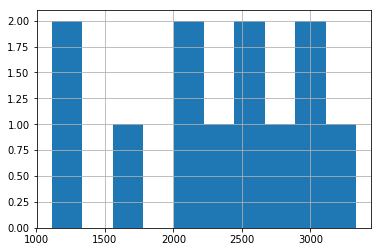

In [11]:
node_info.Publication_year.value_counts().hist()

### wordtovec, nltk